In [1]:
import warnings  
warnings.filterwarnings('ignore')

In [2]:
pip install fosforml

     |████████████████████████████████| 51kB 5.3MB/s eta 0:00:011
     |████████████████████████████████| 1.9MB 21.2MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 87.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 17.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 16.6MB/s eta 0:00:01
     |████████████████████████████████| 98.7MB 261kB/s  eta 0:00:01B/s eta 0:00:02
     |████████████████████████████████| 39.9MB 78.8MB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 78.8MB/s eta 0:00:01
     |████████████████████████████████| 133kB 79.7MB/s eta 0:00:01
     |████████████████████████████████| 174kB 78.4MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 90.7MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 127kB/s s eta 0:00:01
     |████████████████████████████████| 81kB 16.9MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 96.5MB/s eta 0:00:01
     |████████████████████████████████| 307k

In [3]:
pip install seaborn

     |████████████████████████████████| 296kB 8.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

     |████████████████████████████████| 10.8MB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 235kB 90.5MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')



daily_data_df = pd.read_csv('master data.csv')
#inventory_fact_df = pd.read_csv('inventory_fact.csv')
campaign_data_df  = pd.read_csv('campaign_data.csv')

In [7]:
#convert date column to datetime format
daily_data_df['DATE'] = pd.to_datetime(daily_data_df['DATE'])

In [9]:
'''daily_data_df['7_day_rolling_avg_quantity'] = daily_data_df.groupby('PRODUCT_ID')['QUANTITY'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
 
daily_data_df['1_day_lag_quantity'] = daily_data_df.groupby('PRODUCT_ID')['QUANTITY'].shift(1)

daily_data_df['7_day_lag_quantity'] = daily_data_df.groupby('PRODUCT_ID')['QUANTITY'].shift(7)
 
#inventory_fact_df['Low_Stock_Indicator'] = (inventory_fact_df['Running_Total_Stock'] < threshold).astype(int)
 
#daily_data_df['Is_Promotion'] = daily_data_df['Date'].isin(promotional_dates).astype(int)
 
daily_data_df['Price_Above_Competitor'] = (daily_data_df['SELLING_PRICE'] > daily_data_df['COMPETITOR_PRICE']).astype(int)

daily_data_df['Price_Below_Competitor'] = (daily_data_df['SELLING_PRICE'] < daily_data_df['COMPETITOR_PRICE']).astype(int)'''

"daily_data_df['7_day_rolling_avg_quantity'] = daily_data_df.groupby('PRODUCT_ID')['QUANTITY'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())\n \ndaily_data_df['1_day_lag_quantity'] = daily_data_df.groupby('PRODUCT_ID')['QUANTITY'].shift(1)\n\ndaily_data_df['7_day_lag_quantity'] = daily_data_df.groupby('PRODUCT_ID')['QUANTITY'].shift(7)\n \n#inventory_fact_df['Low_Stock_Indicator'] = (inventory_fact_df['Running_Total_Stock'] < threshold).astype(int)\n \n#daily_data_df['Is_Promotion'] = daily_data_df['Date'].isin(promotional_dates).astype(int)\n \ndaily_data_df['Price_Above_Competitor'] = (daily_data_df['SELLING_PRICE'] > daily_data_df['COMPETITOR_PRICE']).astype(int)\n\ndaily_data_df['Price_Below_Competitor'] = (daily_data_df['SELLING_PRICE'] < daily_data_df['COMPETITOR_PRICE']).astype(int)"

In [11]:
# Convert 'Date' columns to datetime if they're not already
daily_data_df['DATE'] = pd.to_datetime(daily_data_df['DATE'])
campaign_data_df['Start_Date'] = pd.to_datetime(campaign_data_df['Start_Date'])
# Now, perform the subtraction operation
for category in campaign_data_df['Targeted_Category'].unique():
   promo_dates = campaign_data_df[(campaign_data_df['Targeted_Category'] == category)]
   for _, row in promo_dates.iterrows():
       mask = (daily_data_df['CATEGORY'] == category) & (daily_data_df['DATE'] >= row['Start_Date']) & (daily_data_df['DATE'] <= row['End_Date'])
       daily_data_df.loc[mask, 'Days_Since_Last_Promotion'] = (daily_data_df.loc[mask, 'DATE'] - row['Start_Date']).dt.days
# Fill NaN values, assuming 0 for days without promotion
daily_data_df['Days_Since_Last_Promotion'].fillna(0, inplace=True)
daily_data_df.tail(20)

,DATE,PRODUCT_ID,SELLING_PRICE,COST_PRICE,COMPETITOR_PRICE,SALES,IS_PROMOTION,QUANTITY,CATEGORY,SUBCATEGORY,BRAND,PRODUCT_NAME,DAY_OF_WEEK,MONTH,SEASON,IS_HOLIDAY,IS_WEEKEND,Days_Since_Last_Promotion
155180,2024-03-31,81,97.057408,68.010976,91.764551,1.024926e+05,0,56,Cereals,Oatmeal,DayStart,DayStart Nutty Flakes,Sunday,March,Spring,0,1,0.0
155181,2024-03-31,82,22.388998,17.473036,23.598971,4.647956e+04,0,1624,Cereals,Granola,SunriseBites,SunriseBites Honeyed Bites,Sunday,March,Spring,0,1,0.0
155182,2024-03-31,83,381.790522,195.431670,406.579589,6.242275e+05,1,321,Dairy,Milk,DairyPeak,DairyPeak Premium Drink,Sunday,March,Spring,0,1,22.0
155183,2024-03-31,84,246.649650,125.023659,224.533481,2.871002e+05,1,813,Dairy,Cheese,LushMilk,LushMilk Premium Curd,Sunday,March,Spring,0,1,22.0
155184,2024-03-31,85,165.165280,65.770623,163.616789,7.531537e+04,0,733,Bakery,Bread,SweetCrust,SweetCrust Homestyle Pita,Sunday,March,Spring,0,1,0.0
155185,2024-03-31,86,468.128702,289.544383,473.086825,7.012568e+05,0,1277,Frozen,Frozen Pizza,FrostyDelight,FrostyDelight Frosty Flatbread,Sunday,March,Spring,0,1,0.0
155186,2024-03-31,87,68.961907,52.433532,70.535880,2.251606e+05,1,1587,Cleaning,Wipes,GermBuster,GermBuster Intense Pad,Sunday,March,Spring,0,1,12.0
155187,2024-03-31,88,510.936576,188.776558,498.221757,4.046618e+05,0,441,Beverages,Water,QuenchWell,QuenchWell Bold Filtered,Sunday,March,Spring,0,1,0.0
155188,2024-03-31,89,170.791081,111.886910,183.405955,5.806897e+04,1,729,Dairy,Milk,DairyPeak,DairyPeak Premium Non-Dairy,Sunday,March,Spring,0,1,22.0
155189,2024-03-31,90,462.149403,378.192910,444.419082,1.170624e+06,0,183,Meat,Chicken,PrimeCut,PrimeCut Premium Wings,Sunday,March,Spring,0,1,0.0


In [12]:
# Fill NaN values, assuming 0 for days without promotion

daily_data_df['Days_Since_Last_Promotion'].fillna(0, inplace=True)

#daily_data_df['Competitor_Price_Change'] = daily_data_df.groupby('PRODUCT_ID')['COMPETITOR_PRICE'].diff().fillna(0)

#daily_data_df['Market_Demand'] = daily_data_df.groupby('Date')['Units_Sold'].transform('sum')


In [12]:
#daily_data_df['Selling_Price_Daily_Change'] = daily_data_df.groupby('PRODUCT_ID')['SELLING_PRICE'].diff().fillna(0)

In [13]:
#daily_data_df['Profit_Margin'] = daily_data_df['SELLING_PRICE'] - daily_data_df['COST_PRICE']

In [14]:
daily_data_df.columns

Index(['DATE', 'PRODUCT_ID', 'SELLING_PRICE', 'COST_PRICE', 'COMPETITOR_PRICE',
       'SALES', 'IS_PROMOTION', 'QUANTITY', 'CATEGORY', 'SUBCATEGORY', 'BRAND',
       'PRODUCT_NAME', 'DAY_OF_WEEK', 'MONTH', 'SEASON', 'IS_HOLIDAY',
       'IS_WEEKEND', 'Days_Since_Last_Promotion'],
      dtype='object')

# CORRELATION ANALYSIS

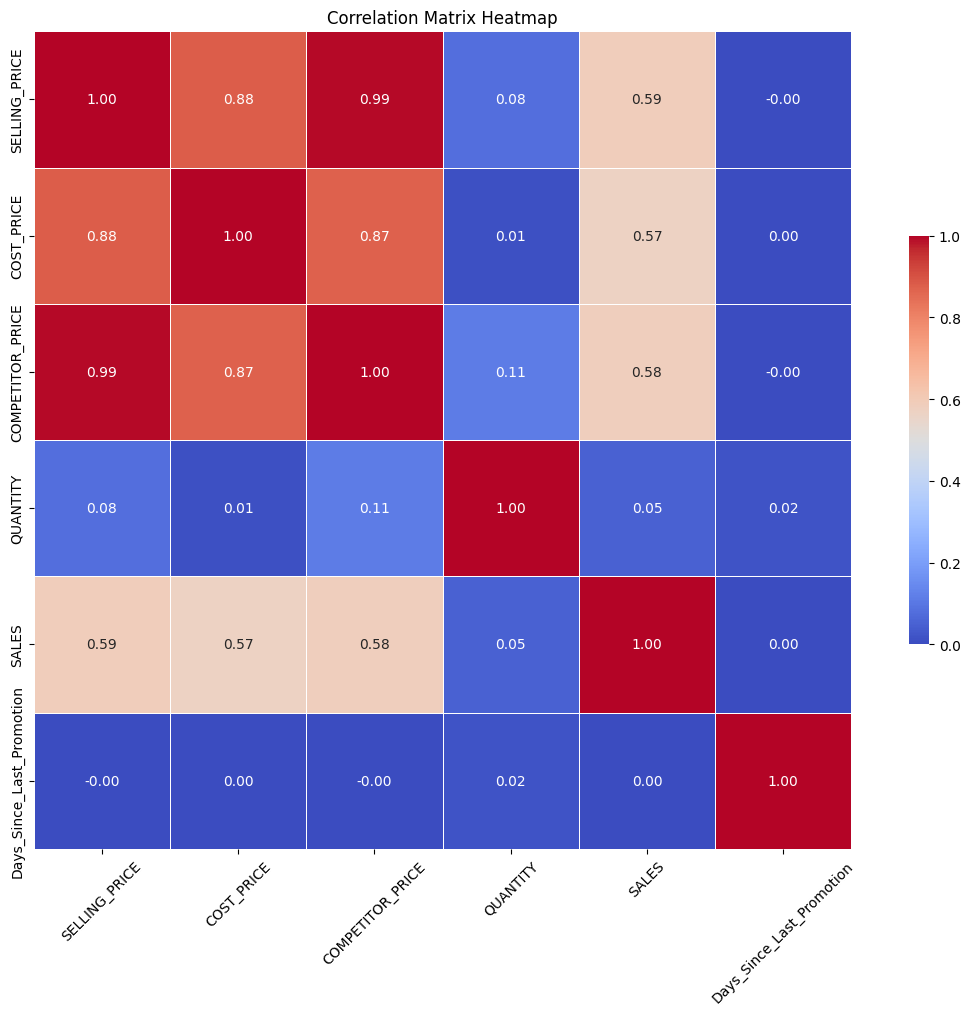

In [16]:
import pandas as pd

import matplotlib.pyplot as plt
df=daily_data_df

numerical_cols = [ 'SELLING_PRICE', 'COST_PRICE', 'COMPETITOR_PRICE',
                 'QUANTITY', 'SALES', 'Days_Since_Last_Promotion']

# Filter the DataFrame
filtered_df = df[numerical_cols]
# Compute the correlation matrix
correlation_matrix = filtered_df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,
           cbar_kws={"shrink": .5}, linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()

# Preparing the data for SELLING PRICE model fitting


In [17]:
daily_data_df.columns

Index(['DATE', 'PRODUCT_ID', 'SELLING_PRICE', 'COST_PRICE', 'COMPETITOR_PRICE',
       'SALES', 'IS_PROMOTION', 'QUANTITY', 'CATEGORY', 'SUBCATEGORY', 'BRAND',
       'PRODUCT_NAME', 'DAY_OF_WEEK', 'MONTH', 'SEASON', 'IS_HOLIDAY',
       'IS_WEEKEND', 'Days_Since_Last_Promotion'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
# Assuming 'Selling_Price' is your target variable
'''X = daily_data_df.drop(['SELLING_PRICE', 'DATE','QUANTITY','SALES','7_day_rolling_avg_sales', '1_day_lag_sales',
       '7_day_lag_sales','Profit_Margin','Days_Since_Last_Promotion'], axis=1)  # Dropping 'Date' as it's not a feature
y = daily_data_df['SELLING_PRICE']'''
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"X = daily_data_df.drop(['SELLING_PRICE', 'DATE','QUANTITY','SALES','7_day_rolling_avg_sales', '1_day_lag_sales',\n       '7_day_lag_sales','Profit_Margin','Days_Since_Last_Promotion'], axis=1)  # Dropping 'Date' as it's not a feature\ny = daily_data_df['SELLING_PRICE']"

In [21]:
train = daily_data_df[daily_data_df['DATE']<'2024-03-01']
test = daily_data_df[daily_data_df['DATE']>='2024-03-01']
X_train = train.drop(['SELLING_PRICE', 'DATE','QUANTITY','SALES','Days_Since_Last_Promotion','CATEGORY','SUBCATEGORY','BRAND','PRODUCT_NAME','DAY_OF_WEEK','MONTH','SEASON'], axis=1)  # Dropping 'Date' as it's not a feature
y_train = train['SELLING_PRICE']
X_test = test.drop(['SELLING_PRICE', 'DATE','QUANTITY','SALES','Days_Since_Last_Promotion','CATEGORY','SUBCATEGORY','BRAND','PRODUCT_NAME','DAY_OF_WEEK','MONTH','SEASON'], axis=1)  # Dropping 'Date' as it's not a feature
y_test =  test['SELLING_PRICE']



In [22]:
X_train

,PRODUCT_ID,COST_PRICE,COMPETITOR_PRICE,IS_PROMOTION,IS_HOLIDAY,IS_WEEKEND
0,1,205.136907,364.659924,0,0,0
1,2,36.296394,43.856067,0,0,0
2,3,25.475475,52.902257,0,0,0
3,4,146.093738,203.120787,0,0,0
4,5,258.965427,424.871669,0,0,0
...,...,...,...,...,...,...
152095,96,133.402318,217.195713,0,0,0
152096,97,155.834382,189.576894,0,0,0
152097,98,116.107866,175.451067,0,0,0
152098,99,255.883747,263.057956,0,0,0


In [24]:
'''#encoding
# Select categorical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
categorical_cols.append('PRODUCT_ID')
# Apply one-hot encoding to the categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)
# Ensure the same columns in both train and test sets after encoding (important if some categories are missing in the test set)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_scaled = X_train_encoded
X_test_scaled = X_test_encoded'''


'#encoding\n# Select categorical columns\ncategorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]\ncategorical_cols.append(\'PRODUCT_ID\')\n# Apply one-hot encoding to the categorical columns\nX_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)\nX_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)\n# Ensure the same columns in both train and test sets after encoding (important if some categories are missing in the test set)\nX_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join=\'left\', axis=1, fill_value=0)\n\n#scaling\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train_encoded)\nX_test_scaled = scaler.transform(X_test_encoded)\n\nX_train_scaled = X_train_encoded\nX_test_scaled = X_test_encoded'

In [25]:
'''# Check for NaN values in each column of X_train
nan_columns = X_train.columns[X_train.isna().any()].tolist()
# Print the list of columns with NaN values
print("Columns with NaN values:", nan_columns)'''

'# Check for NaN values in each column of X_train\nnan_columns = X_train.columns[X_train.isna().any()].tolist()\n# Print the list of columns with NaN values\nprint("Columns with NaN values:", nan_columns)'

In [26]:
'''#handling NaN values in X data
from sklearn.impute import SimpleImputer
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_scaled)
# Transform the test data with the same imputer
X_test_imputed = imputer.transform(X_test_scaled)'''

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

      

Accuracy Comparison of different models

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [29]:
models = {
   "Linear Regression": LinearRegression(),
   "Decision Tree": DecisionTreeRegressor(random_state=42),
   "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
   "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
   #"XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
   }

In [30]:
pip install tqdm

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
from tqdm import tqdm
results = {}
# Wrap the models.items() with tqdm to display a progress bar
for name, model in tqdm(models.items(), desc="Training Models", unit="model"):
   # Train the model
    
   model.fit(X_train_imputed, y_train)
   # Make predictions
   y_pred = model.predict(X_test_imputed)
   # Calculate RMSE and R² score
   rmse = np.sqrt(mean_squared_error(y_test, y_pred))
   r2 = r2_score(y_test, y_pred)
   n=len(y_test)
   k=X_test.shape[1]
   adjusted_r2 = 1 - ((1-r2)*(n-1))/(n-k-1)
   # Store the results
   results[name] = {'RMSE': rmse, 'R² Score': r2,'adjusted_r2':adjusted_r2}
# Display the results
for model_name, metrics in results.items():
   print(f"{model_name} - RMSE: {metrics['RMSE']:.4f}, R² Score: {metrics['R² Score']:.4f}, Adjusted R² Score: {metrics['adjusted_r2']:.4f}")

Training Models: 100%|██████████| 4/4 [05:22<00:00, 80.71s/model] 

Linear Regression - RMSE: 5.5361, R² Score: 0.9985, Adjusted R² Score: 0.9985
Decision Tree - RMSE: 8.1687, R² Score: 0.9967, Adjusted R² Score: 0.9967
Random Forest - RMSE: 5.5113, R² Score: 0.9985, Adjusted R² Score: 0.9985
Gradient Boosting - RMSE: 7.6036, R² Score: 0.9972, Adjusted R² Score: 0.9972


In [31]:
SP_model = RandomForestRegressor(n_estimators=100, random_state=42)
SP_model.fit(X_train, y_train)

y_pred = SP_model.predict(X_test)

In [32]:
test['Projected Selling Price']=y_pred

In [33]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns=['PRED']

REGISTER MODEL

In [36]:
from fosforml import register_model
from fosforml.constants import MLModelFlavours
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
from fosforml.constants import MLModelFlavours

In [37]:
register_model(
    model_obj=SP_model,
    session=my_session,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    y_pred=y_pred,
    source='Notebook',
    dataset_name="Dynamic_Pricing_Sales_Data",
    dataset_source="InMemory",
    name="Dynamic_Pricing_SP_Model",
    description="prediction of selling price across different products",
    flavour="sklearn",
    model_type="regression",
    conda_dependencies=[]
)
 

Got error object of type 'NoneType' has no len() when trying to read default values from function: <function explained_variance_score.<locals>.explained_variance_score_anon_sproc at 0x7f74a63b14c0>. Proceeding without creating optional arguments


Calculating build time metrics

Progress: ██████████████████                                                     25.0%


The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.*'. Your UDF might not work when the package version is different between the server and your local environment.


Calculating build time metrics

Progress: ███████████████████████████████████                                    50.0%
Calculating build time metrics

Progress: ████████████████████████████████████████████████████                   75.0%
Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


"Failed to register model 'MODEL_7DC7C714_FBF6_4EB1_877B_038DBC598D6B_FDC_DYNAMIC_PRICING_SP_MODEL'. (1300) (1304): 100357 (P0000): Python Interpreter Error:\nOSError: [Errno 28] No space left on device in function CreateModule-2071327c-6322-42b6-9d83-d2b454a0ccb6 with handler predict.infer"

# SALES ML MODEL BUILDING

In [28]:

X_train_sales = train.drop([ 'DATE','SALES','QUANTITY'], axis=1)  
y_train_sales = train['SALES']
X_test_sales = test.drop([ 'DATE','QUANTITY','SALES'], axis=1)  
y_test_sales =  test['SALES']



In [29]:

# Apply one-hot encoding to the categorical columns
X_train_sales_encoded = pd.get_dummies(X_train_sales, columns=categorical_cols)
X_test_sales_encoded = pd.get_dummies(X_test_sales, columns=categorical_cols)
# Ensure the same columns in both train and test sets after encoding (important if some categories are missing in the test set)
X_train_sales_encoded, X_test_sales_encoded = X_train_sales_encoded.align(X_test_sales_encoded, join='left', axis=1, fill_value=0)
'''
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)'''

X_train_sales_scaled = X_train_sales_encoded
X_test_sales_scaled = X_test_sales_encoded


In [30]:

# Fit on the training data and transform it
X_train_sales_imputed = imputer.fit_transform(X_train_sales_scaled)
# Transform the test data with the same imputer
X_test_sales_imputed = imputer.transform(X_test_sales_scaled)



In [33]:
results = {}
# Wrap the models.items() with tqdm to display a progress bar
for name, model in tqdm(models.items(), desc="Training Models", unit="model"):
   # Train the model
   model.fit(X_train_sales_imputed, y_train_sales)
   # Make predictions
   y_pred_sales = model.predict(X_test_sales_imputed)
   # Calculate RMSE and R² score
   rmse = np.sqrt(mean_squared_error(y_test_sales, y_pred_sales))
   r2 = r2_score(y_test_sales, y_pred_sales)
   n=len(y_test)
   k=X_test.shape[1]
   adjusted_r2 = 1 - ((1-r2)*(n-1))/(n-k-1)
   # Store the results
   results[name] = {'RMSE': rmse, 'R² Score': r2,'adjusted_r2':adjusted_r2}
   


Training Models: 100%|██████████| 4/4 [07:47<00:00, 116.84s/model]


In [34]:
# Display the results
for model_name, metrics in results.items():
   print(f"{model_name} - RMSE: {metrics['RMSE']:.4f}, R² Score: {metrics['R² Score']:.4f}, Adjusted R² Score: {metrics['adjusted_r2']:.4f}")

Linear Regression - RMSE: 348479.2850, R² Score: 0.4170, Adjusted R² Score: 0.4134
Decision Tree - RMSE: 494638.7184, R² Score: -0.1746, Adjusted R² Score: -0.1818
Random Forest - RMSE: 351864.5648, R² Score: 0.4056, Adjusted R² Score: 0.4020
Gradient Boosting - RMSE: 356288.9866, R² Score: 0.3906, Adjusted R² Score: 0.3868


In [31]:
Sales_model=RandomForestRegressor(n_estimators=100, random_state=42)
Sales_model.fit(X_train_sales_imputed, y_train_sales)
# Make predictions
y_pred_sales = Sales_model.predict(X_test_sales_imputed)
test['Projected Sales'] = y_pred_sales

In [32]:
test

,DATE,PRODUCT_ID,SELLING_PRICE,COST_PRICE,COMPETITOR_PRICE,SALES,IS_PROMOTION,QUANTITY,CATEGORY,SUBCATEGORY,...,1_day_lag_quantity,7_day_lag_quantity,Price_Above_Competitor,Price_Below_Competitor,Days_Since_Last_Promotion,Competitor_Price_Change,Selling_Price_Daily_Change,Profit_Margin,Projected Selling Price,Projected Sales
152100,2024-03-01,1,383.540818,197.989133,405.290680,133472.20470,0,171,Bakery,Bread,...,104.0,99.0,0,1,0.0,45.802329,-1.885123,185.551685,380.225792,1.227368e+06
152101,2024-03-01,2,43.502901,30.552955,40.457301,105451.03200,0,145,Bakery,Cakes,...,245.0,129.0,1,0,0.0,-6.596502,-1.970561,12.949946,43.786265,1.219451e+05
152102,2024-03-01,3,49.381390,22.282695,49.820216,64442.71391,0,551,Beverages,Soft Drinks,...,531.0,351.0,0,1,0.0,-4.012475,-1.209635,27.098695,48.710736,1.156618e+05
152103,2024-03-01,4,186.108696,157.102309,189.534233,388594.95760,0,894,Cleaning,Wipes,...,837.0,985.0,0,1,0.0,-8.097157,5.063176,29.006388,185.432868,4.563059e+05
152104,2024-03-01,5,459.921642,295.345194,436.443848,860053.47120,0,693,Cleaning,Disinfectants,...,1173.0,1073.0,1,0,0.0,-29.675271,-4.434920,164.576448,464.229561,7.301295e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155195,2024-03-31,96,216.330694,128.139932,203.075904,140182.28990,1,891,Dairy,Cheese,...,859.0,1397.0,1,0,22.0,-9.700018,-4.921920,88.190762,208.800468,3.629279e+05
155196,2024-03-31,97,200.992760,136.927526,219.748747,114163.88750,0,1607,Bakery,Cakes,...,1747.0,1119.0,0,1,0.0,10.791856,0.765215,64.065233,209.175655,3.320429e+05
155197,2024-03-31,98,188.888741,138.307450,195.910036,589143.98350,1,108,Cleaning,Disinfectants,...,56.0,66.0,0,1,12.0,20.195705,3.841565,50.581291,186.237691,4.203814e+05
155198,2024-03-31,99,278.653458,204.865767,274.796798,652606.39870,0,104,Cereals,Corn Flakes,...,179.0,166.0,1,0,0.0,-7.713147,3.630951,73.787691,285.688837,3.070894e+05


In [33]:
train

,DATE,PRODUCT_ID,SELLING_PRICE,COST_PRICE,COMPETITOR_PRICE,SALES,IS_PROMOTION,QUANTITY,CATEGORY,SUBCATEGORY,...,Month,7_day_rolling_avg_quantity,1_day_lag_quantity,7_day_lag_quantity,Price_Above_Competitor,Price_Below_Competitor,Days_Since_Last_Promotion,Competitor_Price_Change,Selling_Price_Daily_Change,Profit_Margin
0,2020-01-01,1,361.072475,205.136907,364.659924,770167.58840,0,147,Bakery,Bread,...,1,147.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,155.935568
1,2020-01-01,2,42.896200,36.296394,43.856067,170555.29120,0,204,Bakery,Cakes,...,1,204.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,6.599806
2,2020-01-01,3,49.305021,25.475475,52.902257,113598.76750,0,520,Beverages,Soft Drinks,...,1,520.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,23.829546
3,2020-01-01,4,192.328490,146.093738,203.120787,244257.18260,0,994,Cleaning,Wipes,...,1,994.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,46.234753
4,2020-01-01,5,463.593618,258.965427,424.871669,543331.72090,0,699,Cleaning,Disinfectants,...,1,699.000000,NaN,NaN,1,0,0.0,0.000000,0.000000,204.628191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152095,2024-02-29,96,201.595280,133.402318,217.195713,55841.89253,0,1004,Dairy,Cheese,...,2,886.571429,999.0,688.0,0,1,0.0,7.465235,0.827922,68.192962
152096,2024-02-29,97,206.227553,155.834382,189.576894,603009.36410,0,713,Bakery,Cakes,...,2,977.285714,737.0,853.0,1,0,0.0,4.372779,5.749183,50.393170
152097,2024-02-29,98,176.899831,116.107866,175.451067,374673.84200,0,51,Cleaning,Disinfectants,...,2,59.285714,73.0,46.0,1,0,0.0,4.309702,7.977624,60.791965
152098,2024-02-29,99,265.119380,255.883747,263.057956,74233.42640,0,85,Cereals,Corn Flakes,...,2,132.142857,79.0,93.0,1,0,0.0,-13.651766,-17.991454,9.235633


In [34]:
train

,DATE,PRODUCT_ID,SELLING_PRICE,COST_PRICE,COMPETITOR_PRICE,SALES,IS_PROMOTION,QUANTITY,CATEGORY,SUBCATEGORY,...,Month,7_day_rolling_avg_quantity,1_day_lag_quantity,7_day_lag_quantity,Price_Above_Competitor,Price_Below_Competitor,Days_Since_Last_Promotion,Competitor_Price_Change,Selling_Price_Daily_Change,Profit_Margin
0,2020-01-01,1,361.072475,205.136907,364.659924,770167.58840,0,147,Bakery,Bread,...,1,147.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,155.935568
1,2020-01-01,2,42.896200,36.296394,43.856067,170555.29120,0,204,Bakery,Cakes,...,1,204.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,6.599806
2,2020-01-01,3,49.305021,25.475475,52.902257,113598.76750,0,520,Beverages,Soft Drinks,...,1,520.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,23.829546
3,2020-01-01,4,192.328490,146.093738,203.120787,244257.18260,0,994,Cleaning,Wipes,...,1,994.000000,NaN,NaN,0,1,0.0,0.000000,0.000000,46.234753
4,2020-01-01,5,463.593618,258.965427,424.871669,543331.72090,0,699,Cleaning,Disinfectants,...,1,699.000000,NaN,NaN,1,0,0.0,0.000000,0.000000,204.628191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152095,2024-02-29,96,201.595280,133.402318,217.195713,55841.89253,0,1004,Dairy,Cheese,...,2,886.571429,999.0,688.0,0,1,0.0,7.465235,0.827922,68.192962
152096,2024-02-29,97,206.227553,155.834382,189.576894,603009.36410,0,713,Bakery,Cakes,...,2,977.285714,737.0,853.0,1,0,0.0,4.372779,5.749183,50.393170
152097,2024-02-29,98,176.899831,116.107866,175.451067,374673.84200,0,51,Cleaning,Disinfectants,...,2,59.285714,73.0,46.0,1,0,0.0,4.309702,7.977624,60.791965
152098,2024-02-29,99,265.119380,255.883747,263.057956,74233.42640,0,85,Cereals,Corn Flakes,...,2,132.142857,79.0,93.0,1,0,0.0,-13.651766,-17.991454,9.235633


Register Model in FDC

In [195]:
y_pred = pd.DataFrame(y_pred)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train_imputed = pd.DataFrame(X_train_imputed)
X_test_imputed = pd.DataFrame(X_test_imputed)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_pred_sales = pd.DataFrame(y_pred_sales)
X_train_sales_imputed = pd.DataFrame(X_train_sales_imputed)
X_test_sales_imputed = pd.DataFrame(X_test_sales_imputed)

In [200]:
X_train.rename(columns={'Day_of_Week': 'DAY_OF_WEEK', 'Month': 'MONTH', 'Price_Above_Competitor': 'PRICE_ABOVE_COMPETITOR', 'Price_Below_Competitor': 'PRICE_BELOW_COMPETITOR', 'Competitor_Price_Change': 'COMPETITOR_PRICE_CHANGE', 'Selling_Price_Daily_Change': 'SELLING_PRICE_CHANGE'}, inplace=True)

In [201]:
X_test.rename(columns={'Day_of_Week': 'DAY_OF_WEEK', 'Month': 'MONTH', 'Price_Above_Competitor': 'PRICE_ABOVE_COMPETITOR', 'Price_Below_Competitor': 'PRICE_BELOW_COMPETITOR', 'Competitor_Price_Change': 'COMPETITOR_PRICE_CHANGE', 'Selling_Price_Daily_Change': 'SELLING_PRICE_CHANGE'}, inplace=True)

In [166]:
y_pred.columns = ["PRED"]

In [173]:
# Create a mapping of month numbers to names
month_mapping = {
   1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
# Apply the mapping to the "MONTH" column that contains month numbers
X_train['MONTH'] = X_train['MONTH'].replace(month_mapping)
X_test['MONTH'] = X_test['MONTH'].replace(month_mapping)

In [174]:
# Find duplicated column names
duplicate_train = X_train.columns.duplicated()
duplicate_test = X_test.columns.duplicated()
# Drop the duplicate columns (keeping only the first occurrence of the column)
X_train = X_train.loc[:, ~duplicate_train]
X_test = X_test.loc[:, ~duplicate_test]


In [213]:
y_pred = pd.DataFrame(y_pred)

Calculating build time metrics

Progress: ██████████████████                                                     25.0%


Calculating build time metrics

Progress: ███████████████████████████████████                                    50.0%
Calculating build time metrics

Progress: ████████████████████████████████████████████████████                   75.0%
Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


"Failed to register model 'MODEL_7DC7C714_FBF6_4EB1_877B_038DBC598D6B_FDC_DYNAMIC_PRICING_SP_MODEL'. (1300) (1304): 100357 (P0000): Python Interpreter Error:\nOSError: [Errno 28] No space left on device in function CreateModule-8840385e-37b6-4a5a-9e9e-d586d44f6233 with handler predict.infer"

In [218]:
register_model(
    model_obj=Sales_model,
    session=my_session,
    x_train=X_train_sales_imputed,
    y_train=y_train_sales,
    x_test=X_test_sales_imputed,
    y_test=y_test_sales,
    y_pred=y_pred_sales,
    source="Notebook",
    dataset_name="Dynamic_Pricing_Sales_Data",
    dataset_source="InMemory",
    name="Dynamic_Pricing_Sales_Model",
    description="prediction of sales across different products",
    flavour="sklearn",
    model_type="regression",
    conda_dependencies=[]
)
 

"error, invalid inputs : TypeError('expected string or bytes-like object')"